# Derivatives

Given a function $$f: \mathbf{R} \to \mathbf{R}$$ 

compute $$f'(x) \equiv \lim_{h\to 0} \dfrac{f(x + h) - f(x)}{h}$$

* Paper-and-pencil
* Algorithmic differentiation
* Numeric differentiation (finite differences)

In [2]:
def f11(x):
    return x**11

In [3]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<IPython.core.display.Javascript object>


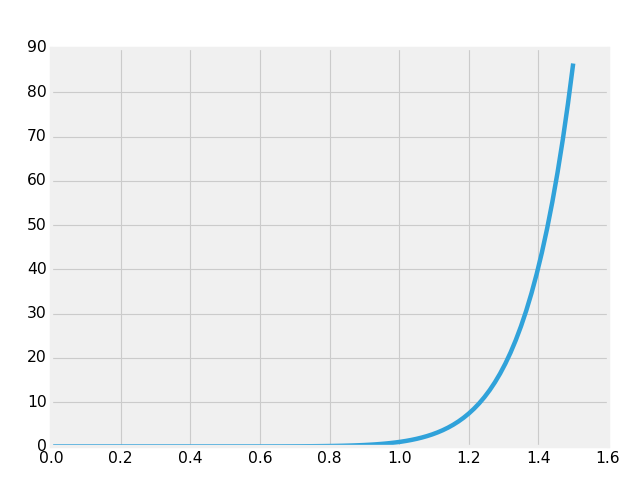

In [4]:
xx = np.linspace(0, 1.5, 101)
plt.plot(xx, [f11(x) for x in xx])

Finite differences: take the definition and evaluate it at some finite (somehow "small") value of $h$:

The two-point forward finite difference:
$$
\mathcal{D}_f = \frac{f(x + h) - f(x)}{h}
$$

Or a central difference (a half-sum of a forward and a backward finite differences)

$$
\mathcal{D}_c = \frac{f(x+h) - f(x-h)}{2h}
$$

In [5]:
# Two-point forward difference

def deriv(f, x, h):
    return (f(x + h) - f(x)) / h

In [6]:
# Two-point central difference
def deriv2(f, x, h):
    df = f(x + h) - f(x - h)
    return df / (2*h)

What is the appropriate value of $h$?

In [7]:
for h in [0.01, 1e-5, 1e-8, 1e-10, 1e-13, 1e-14, 1e-16]:
    print(h, ': ', deriv(f11, 1.0, h))

0.01 :  11.566834666531655
1e-05 :  11.000550016571074
1e-08 :  11.000000488259332
1e-10 :  11.000000910144081
1e-13 :  10.99120794378905
1e-14 :  10.99120794378905
1e-16 :  0.0


<IPython.core.display.Javascript object>


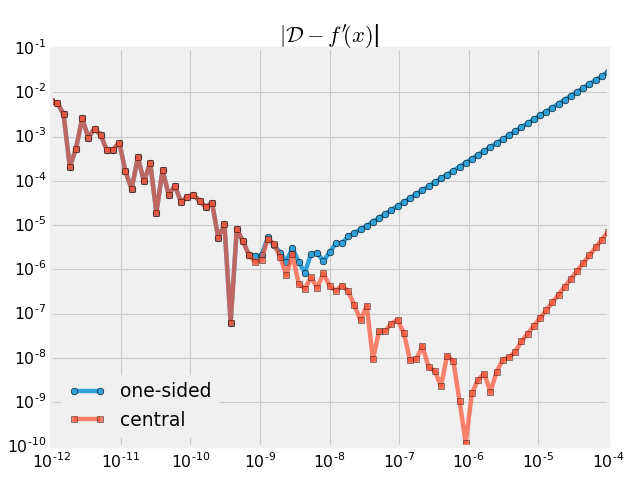

In [12]:
x0 = 1.2
exact = 11 * x0**10
hh = np.logspace(-12, -4, 91)

plt.loglog(hh, [abs(deriv(f11, x0, h) - exact) for h in hh],
           'o-', label='one-sided')
plt.loglog(hh, [abs(deriv2(f11, x0, h) - exact) for h in hh],
           's-', label='central', alpha=0.7)
plt.title(r"$|\mathcal{D} - f'(x)$|")
plt.legend(loc='best')

So, the error is bounded from below. Two regimes seem to exist: at larger values the error follows a power law, and at smaller values there is wiggling.


### Curvature (larger-$h$ regime)


Assuming that $f(x)$ is sufficiently smooth, expand it into the Taylor series in powers of $h$ around the point $x$:

$$ f(x + h) = f(x) + f'(x)\, h + f''(x)\, \dfrac{h^2}{2} + f'''(x) \frac{h^3}{6}  + O(h^4) $$

Therefore, for a one-sided scheme we obtain

$$ \mathcal{D}_f = \frac{f(x + h) - f(x)}{h} = \color{red}{f'(x)} + \frac{f''(x)}{2} h + O(h^2)$$

Likewise, for the central scheme

$$
\mathcal{D}_c = \frac{f(x + h) - f(x -h)}{2 h} = \color{red}{f'(x)} + \frac{f'''(x)}{6} h^2 + O(h^3)
$$

So that the correction is naturally linear (quadratic) for a forward (central) finite difference.

### What is the step of the finite difference, really?

In [20]:
h1 = np.logspace(-14, -4, 11)

# This combination should really be zero --- in exact arithmetics, that is.
delta = ((x0 + h1) - x0) / h1 - 1.0

for hh, dd in zip(h1, delta):
    print(hh, "  ",dd)

1e-14    -0.000799277837359
1e-13    -0.000799277837359
1e-12    8.8900582341e-05
1e-11    8.27403709991e-08
1e-10    8.27403709991e-08
1e-09    8.27403709991e-08
1e-08    -6.07747097092e-09
1e-07    5.83867176829e-10
1e-06    -8.22666379463e-11
1e-05    6.55120402371e-12
0.0001    -1.10134124043e-13


In [21]:
# OK, try controlling the roundoff errors: make the step and denominator consistent with each other

def deriv_1(f, x0, h):
    x1 = x0 + h
    dx = x1 - x0
    df = f(x1) - f(x0)
    return df / dx

<IPython.core.display.Javascript object>


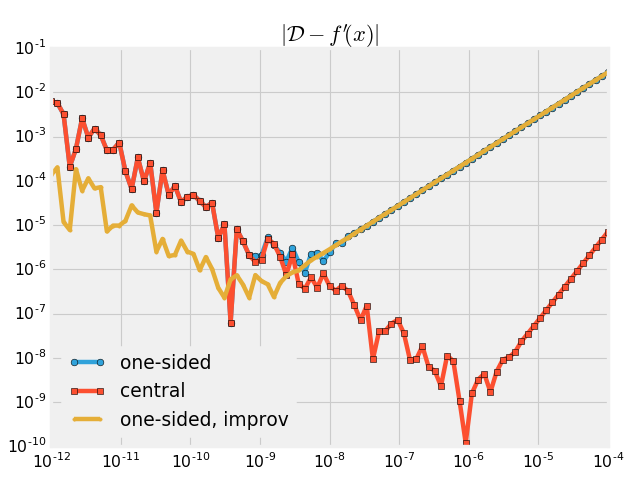

In [14]:
x0 = 1.2

plt.loglog(hh, [abs(deriv(f11, x0, h) - exact) for h in hh], 'o-', label='one-sided')
plt.loglog(hh, [abs(deriv2(f11, x0, h) - exact) for h in hh], 's-', label='central')
plt.loglog(hh, [abs(deriv_1(f11, x0, h) - exact) for h in hh], '.-', label='one-sided, improv')
plt.title(r"$|\mathcal{D} - f'(x)|$")
plt.legend(loc='best')


### Roundoff errors

Consider a one-sided two-point scheme

$$
f'(x) \approx \frac{f(x+h) - f(x)}{h}
$$

and assume that the values of the function $f(x)$ are computed to the relative accuracy $\epsilon_f$. Then the round-off error is 

$$
\epsilon_r \sim \epsilon_f \left|\frac{f(x)}{h} \right|
$$

The total error is the combination of this estimate with the linearization error:

$$
\epsilon_r + \epsilon_t \sim \epsilon_f \frac{f}{\color{red}{h}} + f'' \color{red}{h}\;.
$$

This way, the total error has a minimum at 
$$
h \sim \sqrt{\epsilon_f} \sqrt{f / f''} \;.
$$

Note that the minimum value of the total error has the order of $\epsilon_f^{1/2}$.

Likewise, for a central difference scheme

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h} \;,
$$

the neglected terms of the Taylor series have the order $O(h^2)$, therefore the optimal step is

$$
h \sim \epsilon_f^{\color{red}{1/3}} \;.
$$


## (Local) conclusions

- The step and the denominator of the finite difference scheme should be consistent with each other.


- The optimal step should be scaled according to the appropriate power of the relative error of the evaluation of the function itself: for the method of the order of $O(h^d)$, 

$$h_\mathrm{opt} \sim \epsilon_f^{1/(d+1)}\, x_c\,.$$ 

Here $x_c$  is a characteristic scale at which the values of the functions change. (The simplest heuristics is $x_c = \max{(1, x)}$)


- The best achievable accuracy of a scheme of $O(h^d)$, is $ \sim {\epsilon_{f}}^{d/(d+1)}$. 

## Higher order schemes


The main idea: form linear combinations of $f(x \pm h)$, $f(x \pm 2h)$ etc. 

In simple cases, can use the method of indeterminate coefficients. Example: construct a one-sided scheme of the order $O(h^2)$ for the first derivative.


Consider
$$
\begin{aligned}
A \, f(x) + B\, f(x + h) + C\, f(x + 2h) &= A\, f \\
                                         &+ B\left(\,f + f'\,h + \frac{1}{2} f''\,h^2 + \frac{1}{6} f'''\,h^3 + O(h^4) \right)  \\
                                         &+ C\left(\,f + f'\,2h + \frac{1}{2} f''\,4h^2 + \frac{1}{6} f'''\,8h^3 +  O(h^4) \right) \\
\end{aligned}
$$

Adjusting the coefficients in front of $f(x)$, $f'(x)$ and $f''(x)$, we find

$$
f'(x) = \frac{ -\frac{3}{2} f(x) + 2 f(x+h) -\frac{1}{2} f(x + 2h) }{h} + O(h^2) \;.
$$

Likewise,

$$
f''(x) = \frac{f(x) - 2 f(x + h) + f(x + 2h)}{h^2} + O(h) \;.
$$


For a better algorithm of generating such schemes see:

B. Fornberg, _Generation of finite difference formulas on arbitrary spaced grids_, Mathematics of Computation **51**, 669 (1988).

The tables are reproduced, e.g., in https://en.wikipedia.org/wiki/Finite_difference_coefficient


## Improving the accuracy: Richardson extrapolation

Consider some quantity $Z(h)$ which depends on $h$ with some exponent $\alpha$:

$$Z(h) = Z_* + K h^\alpha \;.$$

Suppose that we want to compute the limiting value $Z_* \equiv Z(h=0)$, and that we can only compute $Z(h)$ at various values of $h > 0$

Then
$$
\left\{
%
\begin{aligned}
Z(h) &= Z_* + K\, h^\alpha \\
Z\left(\frac{h}{q}\right) &= Z_* + K \left(\frac{h}{q} \right)^\alpha
\end{aligned}
%
\right.
$$

and

$$
\frac{q^\alpha Z\left(\frac{h}{q}\right) - Z(h)}{q^\alpha -1} = Z_*
$$


Consider a second order central finite difference scheme, 

$$
\begin{aligned}
Z_h &= \frac{f(x + h) - f(x - h)}{2\,h} \\
    &= f'(x) + K_2 h^2 + K_4 h^4 + \dots \;,
\end{aligned}
$$

where the coefficients $K_s$ are independent of $h$.

The scheme $Z_h$ has the order $O(h^2)$. The Richardson extrapolant

$$
Z^{(2)}_h = \frac{q^2 Z_{h/q} - Z_h}{q^2 - 1}
$$
has the order $O(h^4)$. 

Likewise, the following extrapolant

$$
Z^{(4)}_h = \frac{q^4 Z^{(2)}_{h/q} - Z^{(2)}_h }{q^4 - 1}
$$
has the order $O(h^6)$.


Using the Richardson extrapolation of high orders requires some care with organizing the computations. The standard way --- also known as the Neville's algorithm --- relies on constructing the upper triangular matrix of the finite differences:

\begin{array}{cccccс}
Z_h &          & Z_{h/2}   &          & Z_{h/4} & \cdots \\
    & \nwarrow &  \uparrow & \nwarrow & \uparrow & \cdots \\
    && \dfrac{2^2 Z_{h/2} - Z_h}{2^2 -1} & &  \dfrac{2^2 Z_{h/4} - Z_{h/2}}{2^2 - 1} & \cdots\\
    &&& \cdots &
\end{array}

Here we use $q=2$ for simplicity. Computations start in the upper left corner of the table and proceed column by column.

Note that in each column we need to evaluate the function $f(x)$ only once in the first row. All other elements of the table are computed as linear combinations of already computed elements as shown by the arrows

Also note that the $n$-th row of the table contains estimates of $f'(x)$ for a sequence of finite difference schemes with the successively smaller step size. We can use the discrepancies between successive approximations of varying orders for estimating the uncertainty of the final estimate of $f'(x)$.

Special care must be taken for controlling the round-off errors and stopping the iterations: computations need to stop when the error stops decreasing (for instance, when the error of the current estimate exceeds the best previous estimate by a factor of two).


## Complex step differentiation

J. N. Lyness, C. B. Moler, _Numerical differentiation of analytic functions_, SIAM J. Numerical Analysis **4**, 202 (1967).

http://blogs.mathworks.com/cleve/2013/10/14/complex-step-differentiation/

Suppose that $f(x)$ can be analytically continued into the complex plane, and that the resulting complex-valued function, $f(z) = u(x, y) + i v(x, y)$, is an analytic function of the complex variable $z = x + iy$. Then, from the Cauchy-Riemann conditions we have

$$
\frac{\partial u }{\partial x} = \frac{\partial v}{\partial y}
$$

For $z = x + i\,0$,

\begin{align}
\frac{df}{dx} &\equiv \left. \frac{\partial u}{\partial x} \,\right|_{(x, 0)} \\
              &= \frac{\partial v}{\partial y} \\
              &= \lim_{h\to 0} \frac{v(x, h) - v(x, 0)}{h} \qquad\qquad (v(x, 0)\equiv 0)\\
              &\equiv \lim_{h\to 0} \frac{\mathrm{Im}\,{f(x + ih)}}{h}
\end{align}

An alternative derivation:

Since by assumption $f(z)$ is an analytic function in the vicinity of $z = x + i\,0$, we can expand it into a Taylor series

$$f(x + ih) = f(x) + f'(x)\, ih + \frac{f''(x)}{2} \, (-h^2) + \frac{f'''(x)}{6} \, (-ih^3) + \dots$$

Thus, for the imaginary part we have

$$
f'(x) = \frac{ \mathrm{Im}\,f(x+ih) }{h} + O(h^2)
$$


# Practice

1. Construct the central finite difference scheme of computing the second derivative with the accuracy of $O(h^2)$.

5. Write a program to compute the derivative of $f(x) = x^3 \ln x$ at $x=0$ with the accuracy of $O(h^2)$. Check the convergence rate with respect to $h$. 

6. Repeat the previous excercise for $f(x) = x^2 \ln x$. Explain the your results.

2. Give an example of a function where the complex step differentiation is not applicable.

3. Write a program which differentiates a given function using the complex step method. Test your program on a function with a known value of the derivative and investigate the convergence rate with respect to the step size.

4. With a direct calculation, show that one step of the Richardson extrapolation applied to the two-point central difference, reproduces the explicit form of the finite difference scheme of the order of $O(h^4)$.

6. Given a function of $N$ variables, compute its gradient.

7. (*) Write a program to compute the first derivative using the Richardson extrapolation. Use the standard two-point central difference scheme as a base. Discuss the ways of estimating the uncertainty of the computation and the stopping criteria.
